In [1]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

In [2]:
# column name
Columns_Name=['Age','Workclass','Final Weight','Education','Education Number of Years','Marital-status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','Hours-per-week','Native-country','Income']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None) # Load the data
df.columns = Columns_Name   # add column name in dataset
df.head()


,Age,Workclass,Final Weight,Education,Education Number of Years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df = df.replace({' ':''}, regex=True)

In [4]:
# replace '?' with NaN
df = df.replace({'?': np.nan})

In [5]:
# Selecting numeric columns
num_cols = ['Age', 'Final Weight', 'Education Number of Years', 'Capital-gain', 'Capital-loss', 'Hours-per-week']
# Define the columns to be encoded using LabelEncoder
cat_cols = ['Education','Workclass', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-country']
# Define the target column
target_cols = ['Income']

In [6]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding and Label Encoding
from sklearn.preprocessing import FunctionTransformer
from imblearn.over_sampling import SMOTE 
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# split data into train and test
from sklearn.model_selection import train_test_split

In [7]:
# Encode the target variable
df['Income'] = LabelEncoder().fit_transform(df['Income'])

In [8]:
df['Income'].value_counts()

0    24720
1     7841
Name: Income, dtype: int64

#### Data is Imbalanced

In [9]:
# Split data
X= df.drop('Income',axis=1)
y = df['Income']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [11]:
# Define numerical pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('std', StandardScaler())
])

# Define the categorical pipeline
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



# Define preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols),
])

In [ ]:
# Encode categorical columns in X_train
X_train[cat_cols] = X_train[cat_cols].apply(LabelEncoder().fit_transform)
# Encode categorical columns in X_test
X_test[cat_cols] = X_test[cat_cols].apply(LabelEncoder().fit_transform)
# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
# Fit and transform the resampled training data
X_train = preprocessor.fit_transform(X_train)
# Transform the testing data (no need to fit again)
X_test = preprocessor.transform(X_test)

In [12]:
# Encode categorical columns in X_train
X_train[cat_cols] = X_train[cat_cols].apply(LabelEncoder().fit_transform)
# Encode categorical columns in X_test
X_test[cat_cols] = X_test[cat_cols].apply(LabelEncoder().fit_transform)

In [13]:
# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [14]:
X_train

,Age,Workclass,Final Weight,Education,Education Number of Years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country
0,22,3,129508,11,9,4,0,3,4,0,0,0,28,38
1,47,3,151267,11,9,2,6,5,2,0,15024,0,40,38
2,46,1,272780,15,10,2,9,0,4,1,0,0,24,38
3,46,6,314770,15,10,0,0,4,4,0,0,0,48,38
4,60,3,389254,11,9,2,0,0,4,1,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34563,73,4,292901,9,13,2,3,0,3,1,0,1778,12,38
34564,54,3,180218,12,14,2,8,0,1,1,0,0,48,35
34565,51,7,159755,8,11,2,13,0,4,1,0,0,49,38
34566,38,3,261066,11,9,2,4,0,4,1,0,0,46,38


In [15]:
# Fit and transform the resampled training data
X_train = preprocessor.fit_transform(X_train)
# Transform the testing data (no need to fit again)
X_test = preprocessor.transform(X_test)

In [16]:
y_train.value_counts()

0    17284
1    17284
Name: Income, dtype: int64

### Now Data Is Balanced

## ML Algorithm

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [18]:
# Define the classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'GradientBoosting Classifier': GradientBoostingClassifier(),
    'XGB Classifier': XGBClassifier()
}

C:\Users\miqba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.737230013307401
Logistic Regression AUC-ROC score: 0.891500080584785



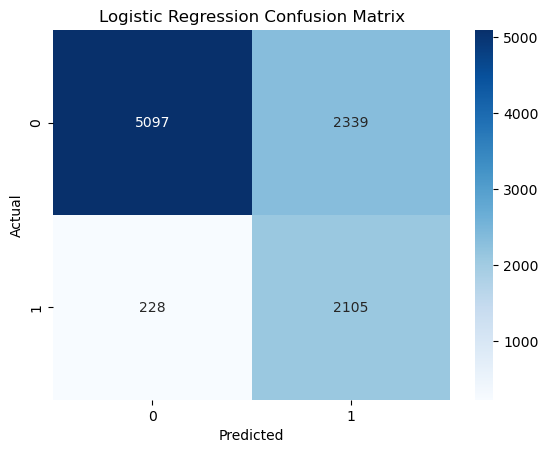

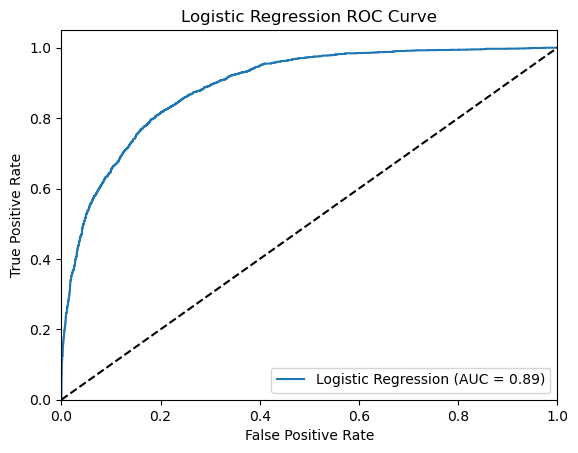

Random Forest accuracy: 0.8476814412938888
Random Forest AUC-ROC score: 0.9059195692368565



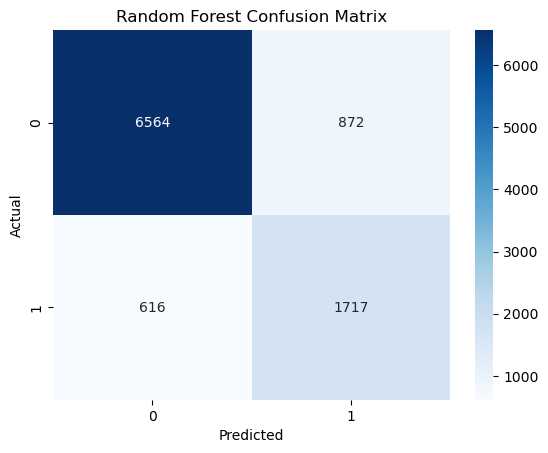

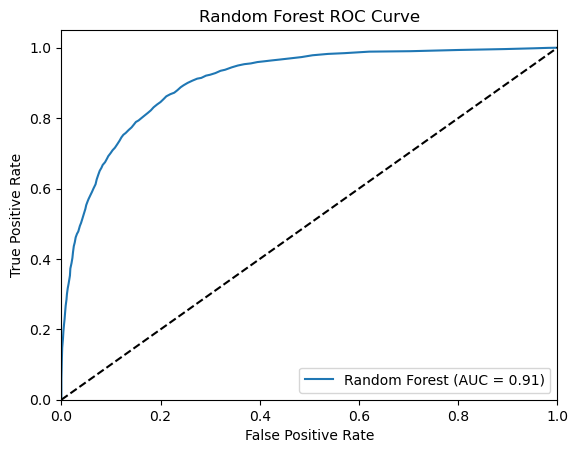

Support Vector Machine accuracy: 0.8318149247620023
Support Vector Machine AUC-ROC score: 0.8972296703263765



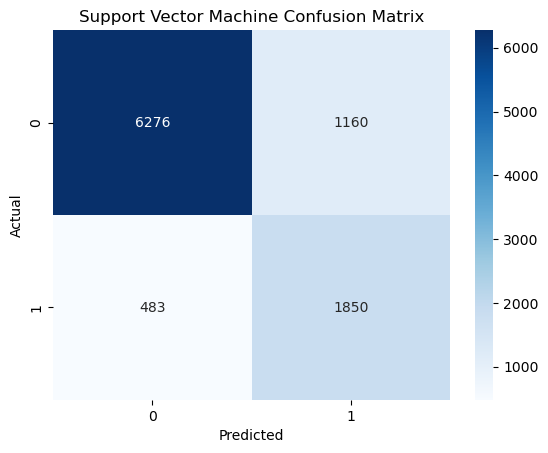

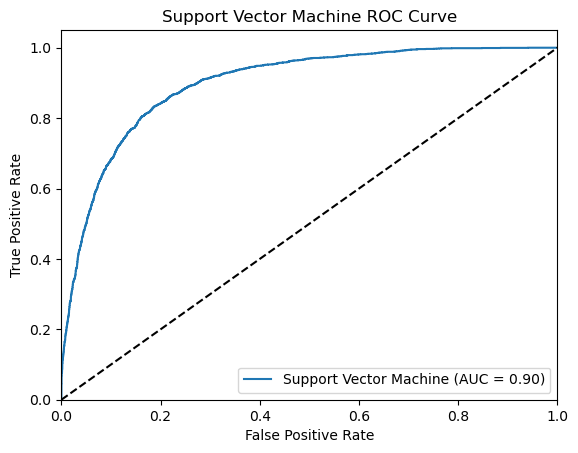

GradientBoosting Classifier accuracy: 0.8486027228989661
GradientBoosting Classifier AUC-ROC score: 0.911092299668415



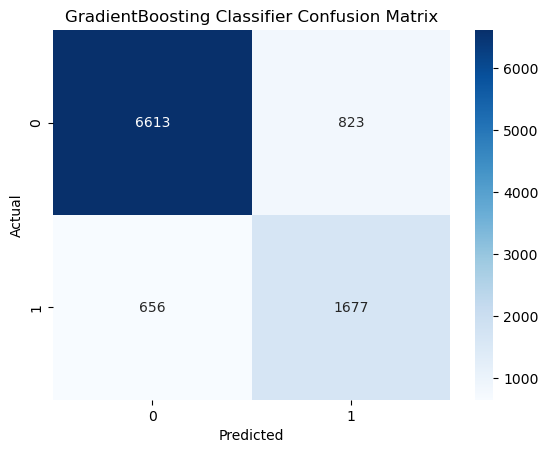

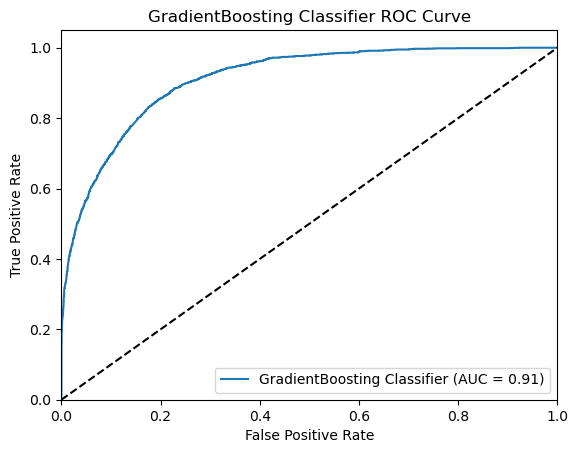

XGB Classifier accuracy: 0.8322243832531477
XGB Classifier AUC-ROC score: 0.9181289423425661



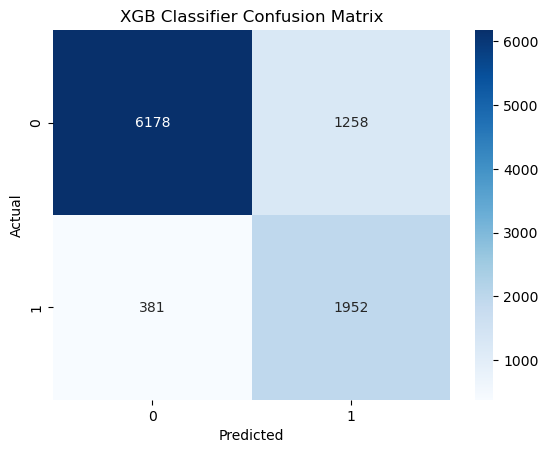

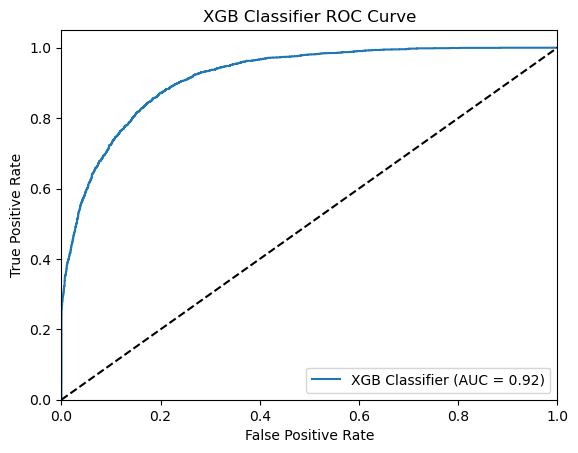

In [19]:
# Train the models and evaluate their performance
accuracy_scores = {}
auc_scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores[model_name] = auc
    
    print(f'{model_name} accuracy: {accuracy}')
    print(f'{model_name} AUC-ROC score: {auc}\n')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

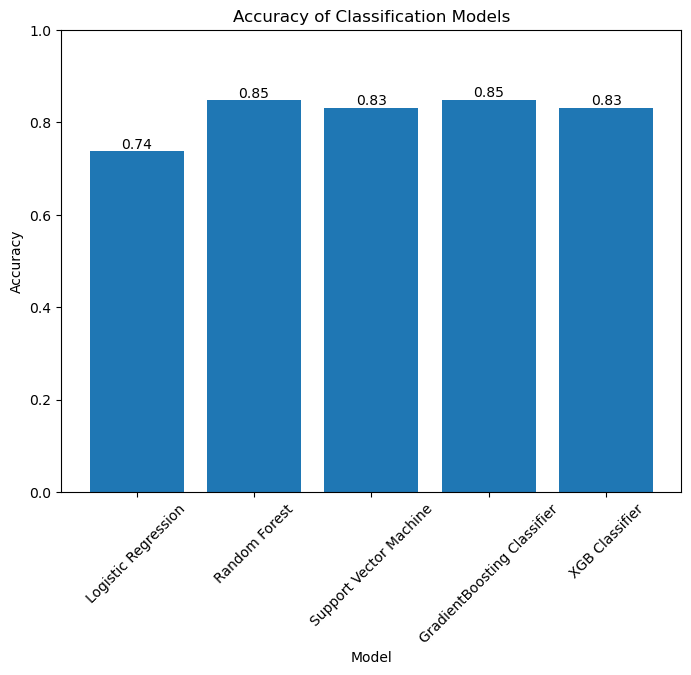

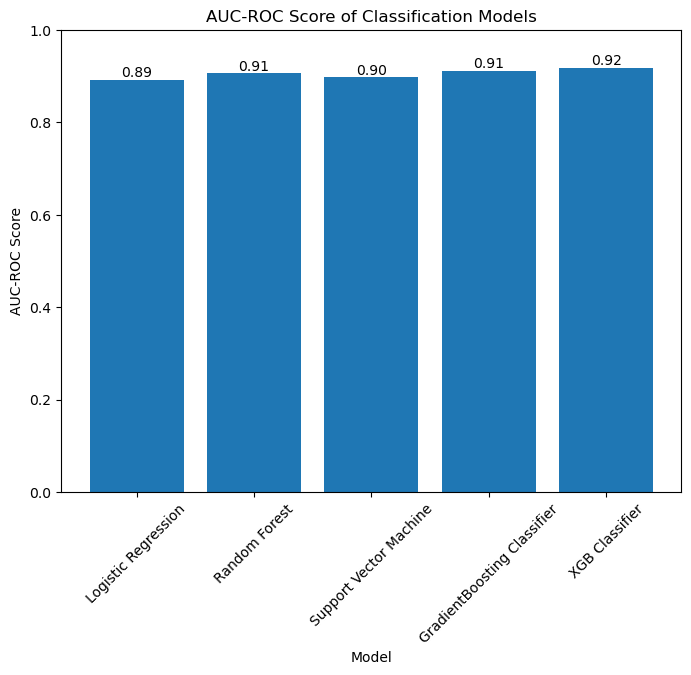

In [20]:
# Plot the accuracy scores
plt.figure(figsize=(8, 6))
bars = plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classification Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# Plot the AUC-ROC scores
plt.figure(figsize=(8, 6))
bars = plt.bar(auc_scores.keys(), auc_scores.values())
plt.xlabel('Model')
plt.ylabel('AUC-ROC Score')
plt.title('AUC-ROC Score of Classification Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()
